In [32]:
import matplotlib.pyplot as plt

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def find_event_file(log_dir):
    """
    查找指定文件夹和fold index下的event文件
    """
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file.startswith("events.out.tfevents"):
                return os.path.join(root, file)
    raise FileNotFoundError("没有找到匹配的TensorBoard日志文件")

def extract_tensorboard_data(event_file, key):
    # 加载TensorBoard日志文件
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    # 检查 key 是否存在
    print(event_acc.Tags()['scalars'])
    if key not in event_acc.Tags()['scalars']:
        raise KeyError(f"The specified key '{key}' was not found in the TensorBoard logs.")

    # 提取指定 key 的值
    events = event_acc.Scalars(key)
    steps = np.array([e.step for e in events])
    values = np.array([e.value for e in events])

    return steps, values


def plot_data(steps, values, labels, title='test title', dash=0.0, ylabel='ylabel'):
    """
    绘制多条曲线在同一张图上

    :param steps: ndarray, x轴数据
    :param values: list of ndarray, 每个ndarray表示一条曲线的y轴数据
    :param labels: list of str, 每条曲线的标签
    :param title: str, 图表标题
    """
    plt.figure()
    for i, value in enumerate(values):
        plt.plot(steps, value, label=labels[i])
    plt.axhline(y=dash, color='r', linestyle='--', label=f'chance level={dash}')
    plt.xlabel('Steps')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

metric_name = [None, 'acc_1', 'acc_2']
num_class = [None, 5, 9]
dataset_name = 1
metric_name = metric_name[dataset_name]
num_class = num_class[dataset_name]
# 1 for SEED_V, 2 for Faced
chance_level = 1.0 / num_class


# 指定路径和 key
log_dir = 'log'  # 修改为你的TensorBoard日志文件路径
log_name = 'Dual_MMLA_riem_wd=0.0001'
fold = 0
version = 0
fold_index = f'{log_name}/{fold}/{log_name}/version_{version}'  # 修改为你需要的fold index
key = f'{metric_name}/val'  # 修改为你感兴趣的key
print(fold_index)

try:
    event_file = find_event_file(os.path.join(log_dir, fold_index))
    steps, acc_1_no_encoder = extract_tensorboard_data(event_file, key)
except (FileNotFoundError, KeyError) as e:
    print(e)


Dual_MMLA_riem_wd=0.0001/0/Dual_MMLA_riem_wd=0.0001/version_0
['loss_class_1/val', 'loss_class_2/val', 'loss_align/val', 'acc_1/val', 'acc_2/val', 'lr/val', 'epoch', 'loss_class_1/train', 'loss_class_2/train', 'loss_align/train', 'acc_1/train', 'acc_2/train', 'lr']


In [34]:
log_dir = 'log'  # 修改为你的TensorBoard日志文件路径
log_name = 'Dual_MMLA_Riem=False_patchSize=30_patchStride=5_hidden_dim=15_out_dim=3_wd=0.00015_alignFactor=0.0'
# fold = 0
version = 0
fold_index = f'{log_name}/{fold}/{log_name}/version_{version}'  # 修改为你需要的fold index
print(fold_index)

try:
    event_file = find_event_file(os.path.join(log_dir, fold_index))
    steps, acc_1_encoder = extract_tensorboard_data(event_file, key)
except (FileNotFoundError, KeyError) as e:
    print(e)

Dual_MMLA_Riem=False_patchSize=30_patchStride=5_hidden_dim=15_out_dim=3_wd=0.00015_alignFactor=0.0/0/Dual_MMLA_Riem=False_patchSize=30_patchStride=5_hidden_dim=15_out_dim=3_wd=0.00015_alignFactor=0.0/version_0
['loss_class_1/val', 'loss_class_2/val', 'loss_align/val', 'acc_1/val', 'acc_2/val', 'lr/val', 'epoch', 'loss_class_1/train', 'loss_class_2/train', 'loss_align/train', 'acc_1/train', 'acc_2/train', 'lr']


In [35]:
acc_1_encoder

array([0.30755347, 0.35878924, 0.31574562, 0.3694807 , 0.38211608,
       0.36698139, 0.37975562, 0.3653152 , 0.36448207, 0.3873924 ,
       0.37434047, 0.37892252, 0.39711192, 0.37017494, 0.38308802,
       0.36462092, 0.38419884, 0.37642321, 0.37989447, 0.34768119,
       0.35948348, 0.36864761, 0.37031379, 0.37434047, 0.37475702,
       0.37031379, 0.34212717, 0.3871147 , 0.36809221, 0.36864761])

In [36]:
acc_1_no_encoder

array([0.26006666, 0.27103582, 0.27547905, 0.28436545, 0.28436545,
       0.30477646, 0.29908359, 0.30074978, 0.31296861, 0.30199945,
       0.31171897, 0.31421828, 0.3104693 , 0.32352126, 0.31296861,
       0.32171619, 0.31491253, 0.31310746, 0.3203277 , 0.32282698,
       0.32296583, 0.32241043, 0.31519023, 0.31907803, 0.31296861,
       0.32463205, 0.3247709 , 0.32754791, 0.32143849, 0.32435435])

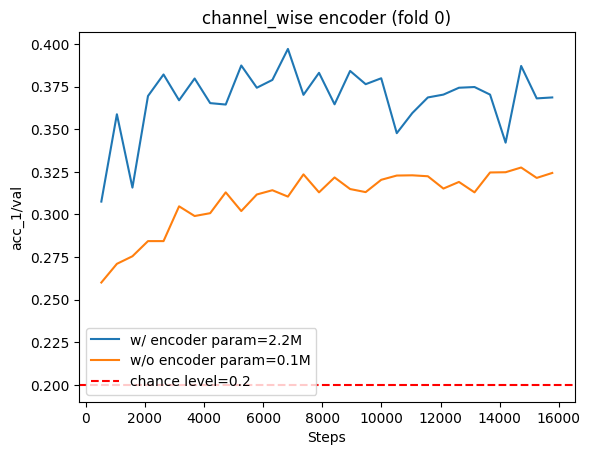

In [37]:
plot_data(steps,
 [acc_1_encoder,
  acc_1_no_encoder],
['w/ encoder param=2.2M', 'w/o encoder param=0.1M'],
 f'channel_wise encoder (fold {fold})',
 dash=chance_level,
 ylabel=key
)